<a href="https://colab.research.google.com/github/Damntoochill/Learning-ML/blob/master/Tensorflow_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
N = 20000 # The number of samples

def sigmoid(x):
  return 1/(1+np.exp(-x))

#Create some random data

x = np.random.randn(N,3) #No of rows = 20000, No of features = 3

w = [0.3,0.5,0.1] # No of weights should be equal to the no of features

b = -0.4

z = np.matmul(w,x.T) + b

y_pre_noise = sigmoid(z)

y = np.random.binomial(1,y_pre_noise)



In [18]:
z.shape

(20000,)

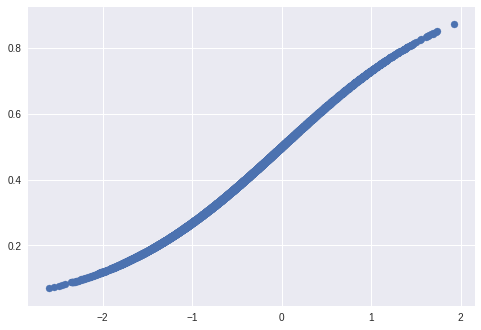

In [23]:
plt.scatter(z,y_pre_noise)
plt.show()

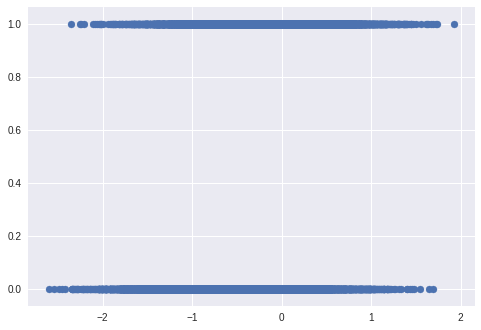

In [24]:
plt.scatter(z,y)
plt.show()

In [21]:
iterations = 50

wb_ = [] #empty list to store the values of weights

g = tf.Graph()#creating a graph

with g.as_default():
  x_node = tf.placeholder(tf.float32, shape = [None,3])
  y_node = tf.placeholder(tf.float32, shape = None)
  
  with tf.name_scope('inferences') as scope:
    w_node = tf.Variable([[0,0,0]], dtype = tf.float32, name = 'weights')
    b_node = tf.Variable(0, dtype = tf.float32, name = 'bias')
    z_node = tf.matmul(w_node, tf.transpose(x_node)) + b_node
    
  with tf.name_scope('loss') as scope:
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y_node, logits = z_node)
    loss = tf.reduce_mean(loss)
    
  with tf.name_scope('train') as scope:
    learning_rate = 0.3
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    
  #initializing the variables 
  init = tf.global_variables_initializer()
  with tf.Session() as sess:
    sess.run(init)
    for iters in range(iterations):
      sess.run(train, {x_node:x, y_node:y})
      if(iters%5 == 0):
        print(iters,sess.run([w_node,b_node]))
        wb_.append(sess.run([w_node,b_node]))
      
    print(50,sess.run([w_node,b_node]))

0 [array([[0.01985412, 0.03508339, 0.00758942]], dtype=float32), -0.026399974]
5 [array([[0.09897294, 0.17424357, 0.03808652]], dtype=float32), -0.1316262]
10 [array([[0.15328427, 0.26901546, 0.05932533]], dtype=float32), -0.20372571]
15 [array([[0.19134663, 0.33494133, 0.07441823]], dtype=float32), -0.25397947]
20 [array([[0.2185201 , 0.38168427, 0.08533625]], dtype=float32), -0.2895594]
25 [array([[0.23819962, 0.41532204, 0.09334149]], dtype=float32), -0.31506634]
30 [array([[0.2526036 , 0.43979844, 0.09926851]], dtype=float32), -0.33352777]
35 [array([[0.26322794, 0.45775452, 0.10368717]], dtype=float32), -0.34698728]
40 [array([[0.27110836, 0.47100642, 0.10699727]], dtype=float32), -0.35685453]
45 [array([[0.2769772 , 0.48082975, 0.10948517]], dtype=float32), -0.36411902]
50 [array([[0.28058282, 0.48684096, 0.11102558]], dtype=float32), -0.36853698]
